In [7]:
import pandas as pd

df =  pd.read_csv('EDA.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,AcceptedCmp2,Complain,Response,Age,Total_Children,Total_Expenses,Total_Transactions,Age_Group,Income_Group,Spending_Group
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,0,0,1,68,0,982000,25,50+,Medium,High
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,0,0,0,71,2,16000,6,50+,Medium,Low
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,0,0,0,60,0,350000,21,50+,High,High
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,0,0,0,41,1,42000,8,30-50,Low,Low
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,0,0,0,44,1,249000,19,30-50,Medium,Medium


In [8]:
# Check data null
null_counts = df.isnull().sum()

# Deleted null
df_cleaned = df.dropna()

# Deleted duplicate date Menghapus data duplikat
df_cleaned = df_cleaned.drop_duplicates()

In [4]:
# Identification categorical coulumn
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# One-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

In [14]:
from sklearn.preprocessing import StandardScaler

# Numeric Features
features = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke',
    'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebPurchases', 'Total_Children',
    'Total_Expenses', 'Total_Transactions', 'Age'
]

# Deleted null
df_cluster = df[features].dropna()

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

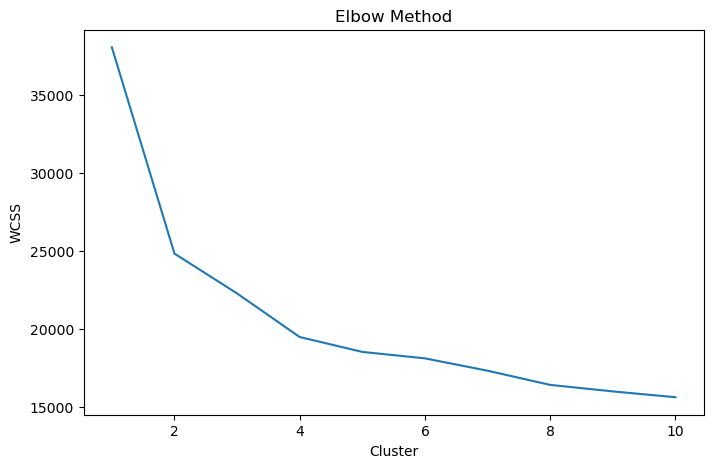

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# WCSS
wcss = []

# 1-10 cluster
K = range(1,11)

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss)
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

# KMeans with 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled) 

# Put labels cluster into Dataframe
df_cluster['Cluster'] = labels

# Silhouette Score
score = silhouette_score(X_scaled, labels)
print('Silhouette Score for k = 4:', score)

# Distribution Point
print(df_cluster['Cluster'].value_counts())

Silhouette Score for k = 4: 0.20028893095154934
Cluster
0    606
1    578
3    542
2    514
Name: count, dtype: int64
